# **RAFT: Fine-Tuning for Retrieval-Augmented Generation**


The world is currently at a fascinating crossroads in how we use artificial intelligence into everyday life. Every week, teams seem to face a very common challenge—how to make their systems more reliable, more responsive, and more valuable. Despite the progress being made, finding the perfect solution still feels like it’s just out of reach.

If you’ve worked on building or improving AI systems before, you’ve probably experienced the difficulty of deciding between two popular approaches: fine-tuning and Retrieval-Augmented Generation. These solutions are often compared as though one is better than the other. But what if i told you you don’t really have to pick one over the other?

In this blog, we’ll explore RAFT (Retrieval-Augmented Fine-Tuning) and discuss why it may be the better choice.


## **Understanding the Evolution of LLM Adaptation**


**The Fine-Tuning Era**

When the world first started working with language models, fine-tuning seemed like the perfect solution. Take a powerful model, train it on your specific data, and watch it become an expert in your domain.

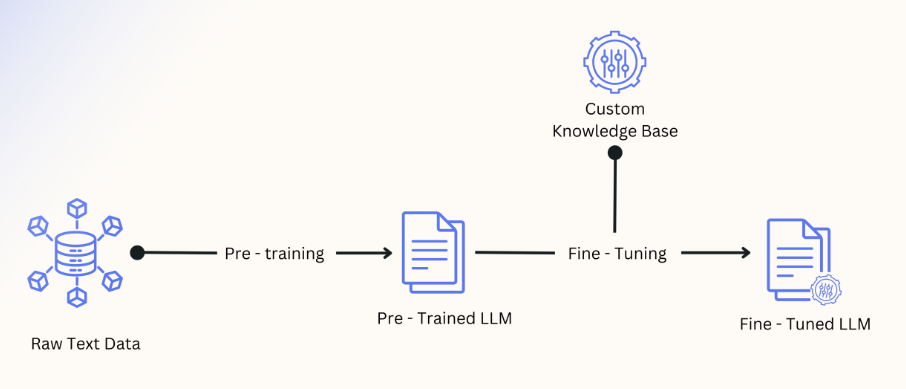
But reality proved more complex…

At first, fine-tuning can deliver highly accurate and relevant results, making it feel like the ideal solution. But as time passes, the model’s performance starts to suffer. Without regular updates, the model starts to provide inaccurate or irrelevant information, reducing its value and effectiveness over time.

Here are the main issues with fine-tuning:

- Information becomes outdated quickly.
- No mechanism for real-time updates.
- Can lead to confidence in incorrect information.


**The RAG Take-Over**

Then came RAG, and it felt like we'd found the answer. Instead of baking all the knowledge into the model, why not let it access information dynamically?

**Retrieval-Augmented Generation** combines LLMs with a retrieval mechanism to access external knowledge bases, enabling the model to generate outputs informed by up-to-date, contextually relevant documents.

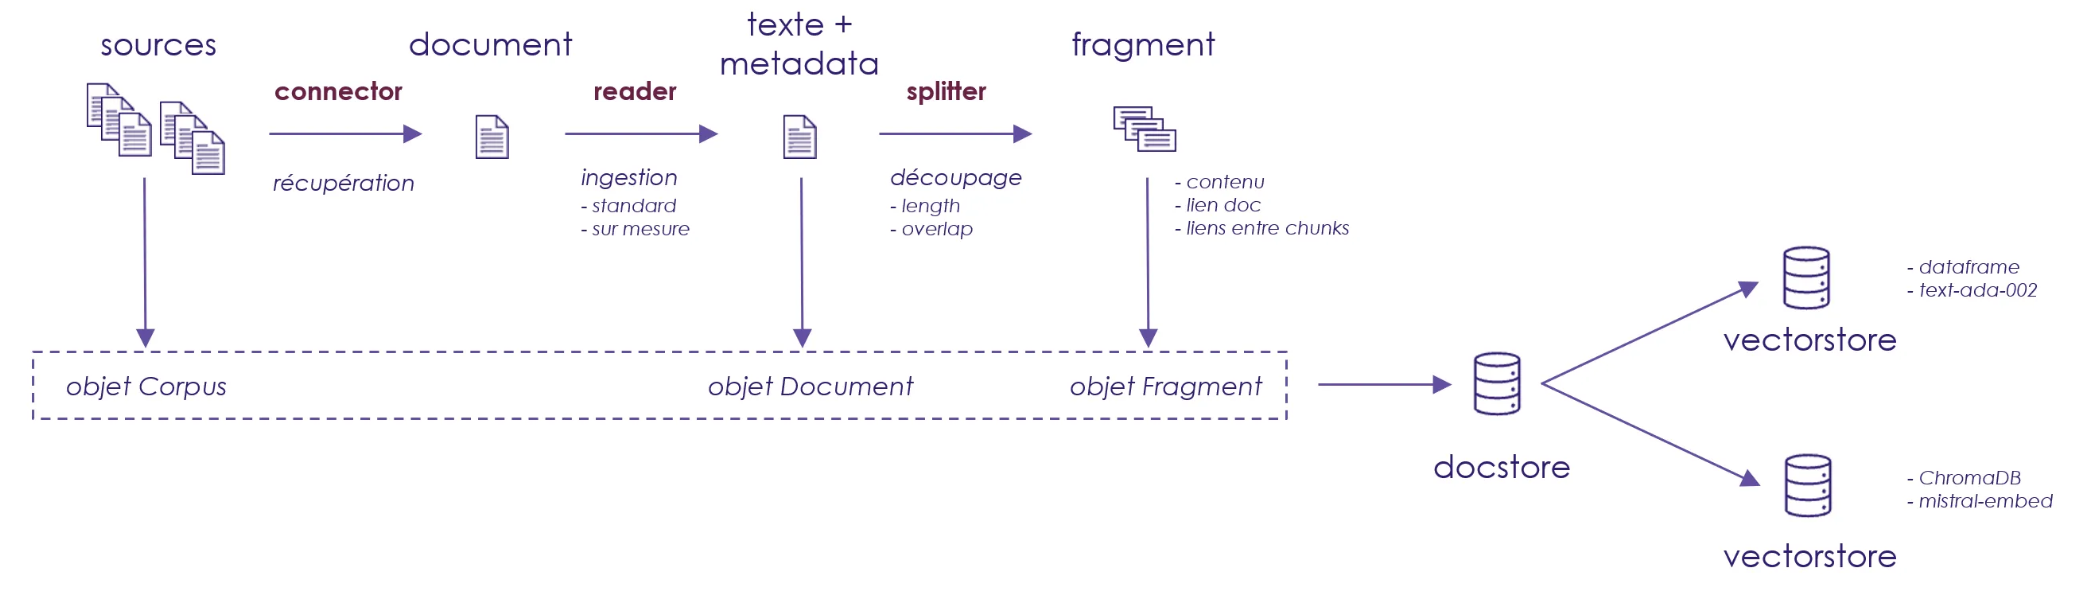

Although this approach solved a lot of issues related to fine-tuning it still brought its own challenges:

- Retrieval Quality Issues.
- Difficulty combining multiple sources.
- Lack of deep understanding.
- Surface-level information synthesis.



## **Enter RAFT: The Best of Both Worlds**

RAFT addresses the shortcomings of traditional methods by blending the strengths of Retrieval-Augmented Generation and fine-tuning. This technique Relies on the use of domain-specific documents during fine-tuning, enabling the model to grasp unique domain patterns.

When this fine-tuned model performs retrieval, it retains the domain-specific knowledge and answering style, ensuring that responses are consistent, contextually accurate, and aligned with the specialized requirements of the domain, even when incorporating newly retrieved data.

In RAFT, training data comprises questions, documents, and detailed chain-of-thought explanations based on the relevant documents. The model learns to generate answers by analyzing these documents, including irrelevant ones, which trains it to differentiate and focus on meaningful information while discarding irrelevant content.



**Why RAFT is Different (And Why You Should Care)**

Let's break this down with a real-world example. Say you're building a financial advisor bot:



**Traditional Fine-tuning Approach:**


```
User: "How should I adjust my portfolio given the current market conditions?"

Model: "Based on historical patterns, diversification across sectors is recommended, with a focus on defensive stocks during market volatility."
```


**Sounds good, but might be using outdated information**

**RAG Approach:**


```
User: "How should I adjust my portfolio given the current market conditions?"

Model: "According to the retrieved documents, the S&P 500 is at X level and inflation is at Y%. These factors suggest... [lists facts without deep analysis]"
```


**Accurate but potentially superficial analysis**

**RAFT Approach:**


```
User: "How should I adjust my portfolio given the current market conditions?"

Model: "Looking at the current market data I've retrieved, we're seeing some interesting trends. The recent Fed announcement about interest rates (from last week's report) suggests a shift in monetary policy. Combining this with the historical patterns of similar market cycles, here's what this could mean for your portfolio..."

```


**Combines current data with deep understanding of financial principles**

## **Implementation Case Studies**

Now that we’ve discussed the advantages of RAFT, let’s dive into a practical tutorial to implement it. We’ll be fine-tuning a model to use as part of a Retrieval-Augmented Generation system.

**Our goal is to teach the model to extract critical information from textual inputs while ignoring irrelevant details.**



For that we will be using The **FreedomIntelligence/RAG-Instruc**t dataset
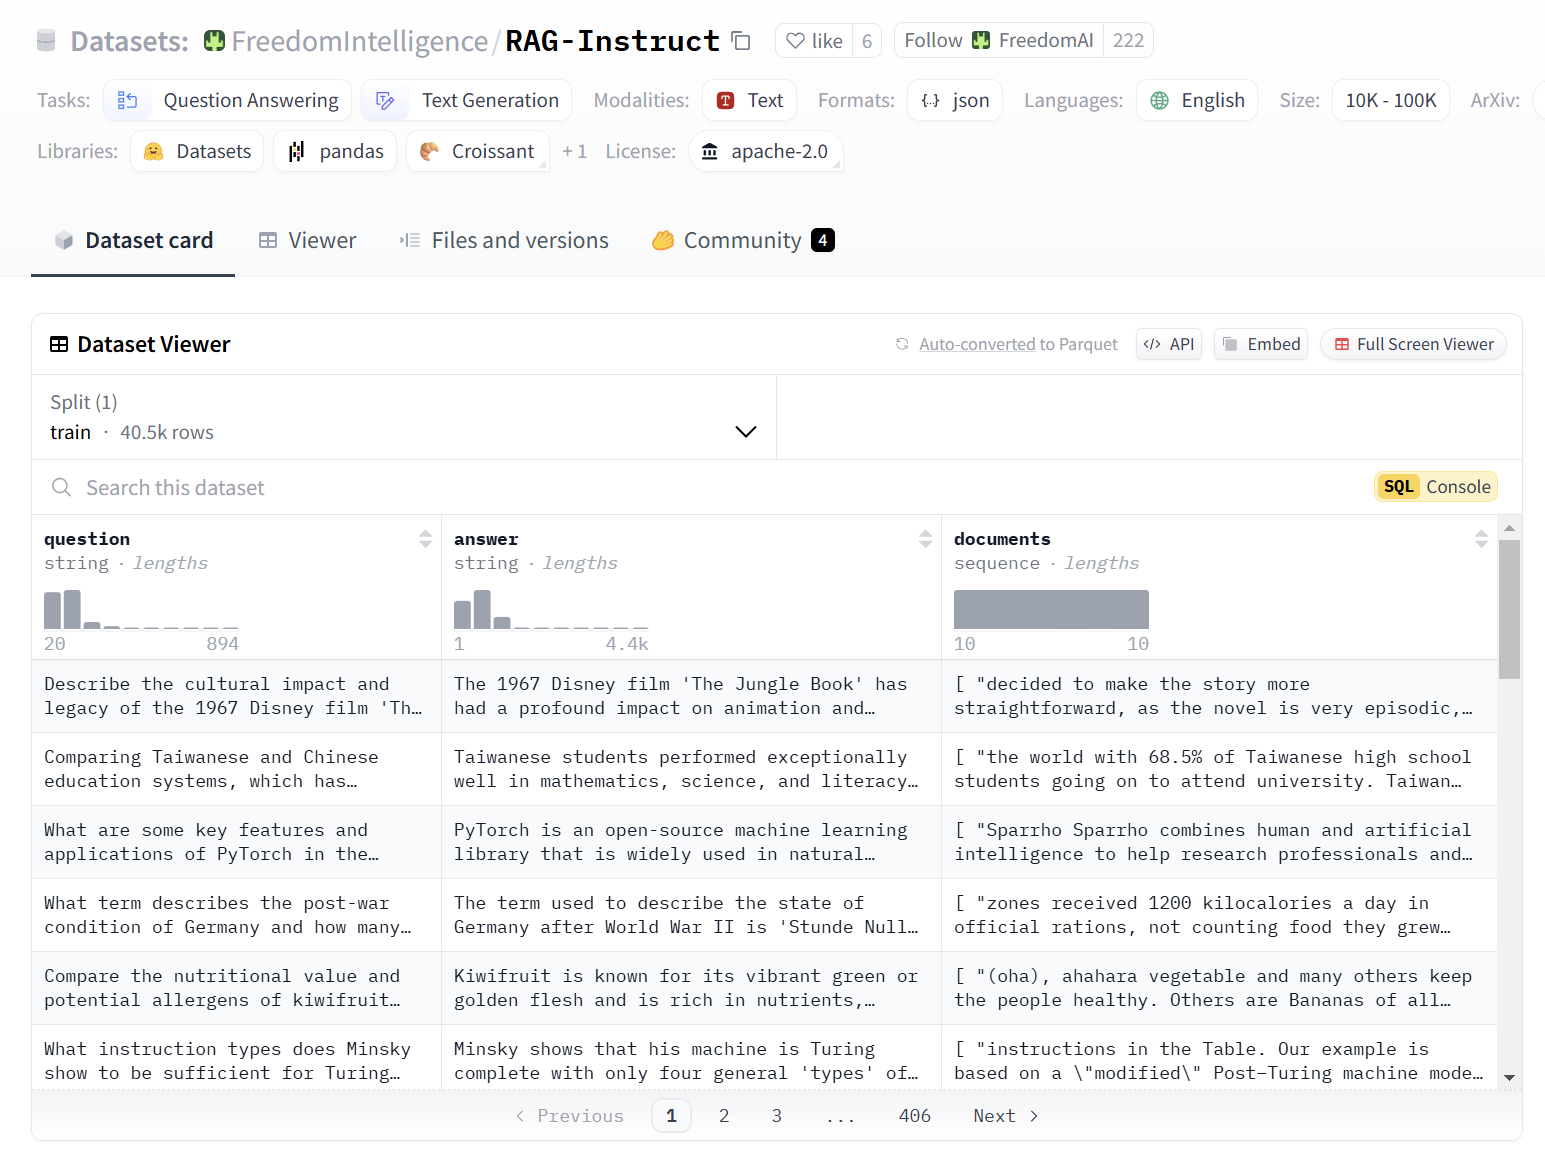

This dataset is an excellent choice for training a RAFT model because of its structure and focus. Each data entry consists of three key elements:

- Question: The user’s query or task.
- Context: A passage or set of information that may contain the answer.
- Response: The expected answer to the question, derived from the context.

This structure mimics the kind of interactions you’d expect in a RAG system, where the model retrieves relevant context and generates meaningful responses. The dataset not only teaches the model how to generate answers but also how to discern relevant information from the context, a skill critical for retrieval-augmented systems.


## **Here are the steps to implement RAFT for your projects:**


**Dataset Preparation**

Before you can fine-tune a model, you need to ensure that the dataset is correctly formatted and structured to maximize its training potential. For this I will be using UbiAI, a platform designed to simplify and accelerate the data preparation and fine-tuning process.


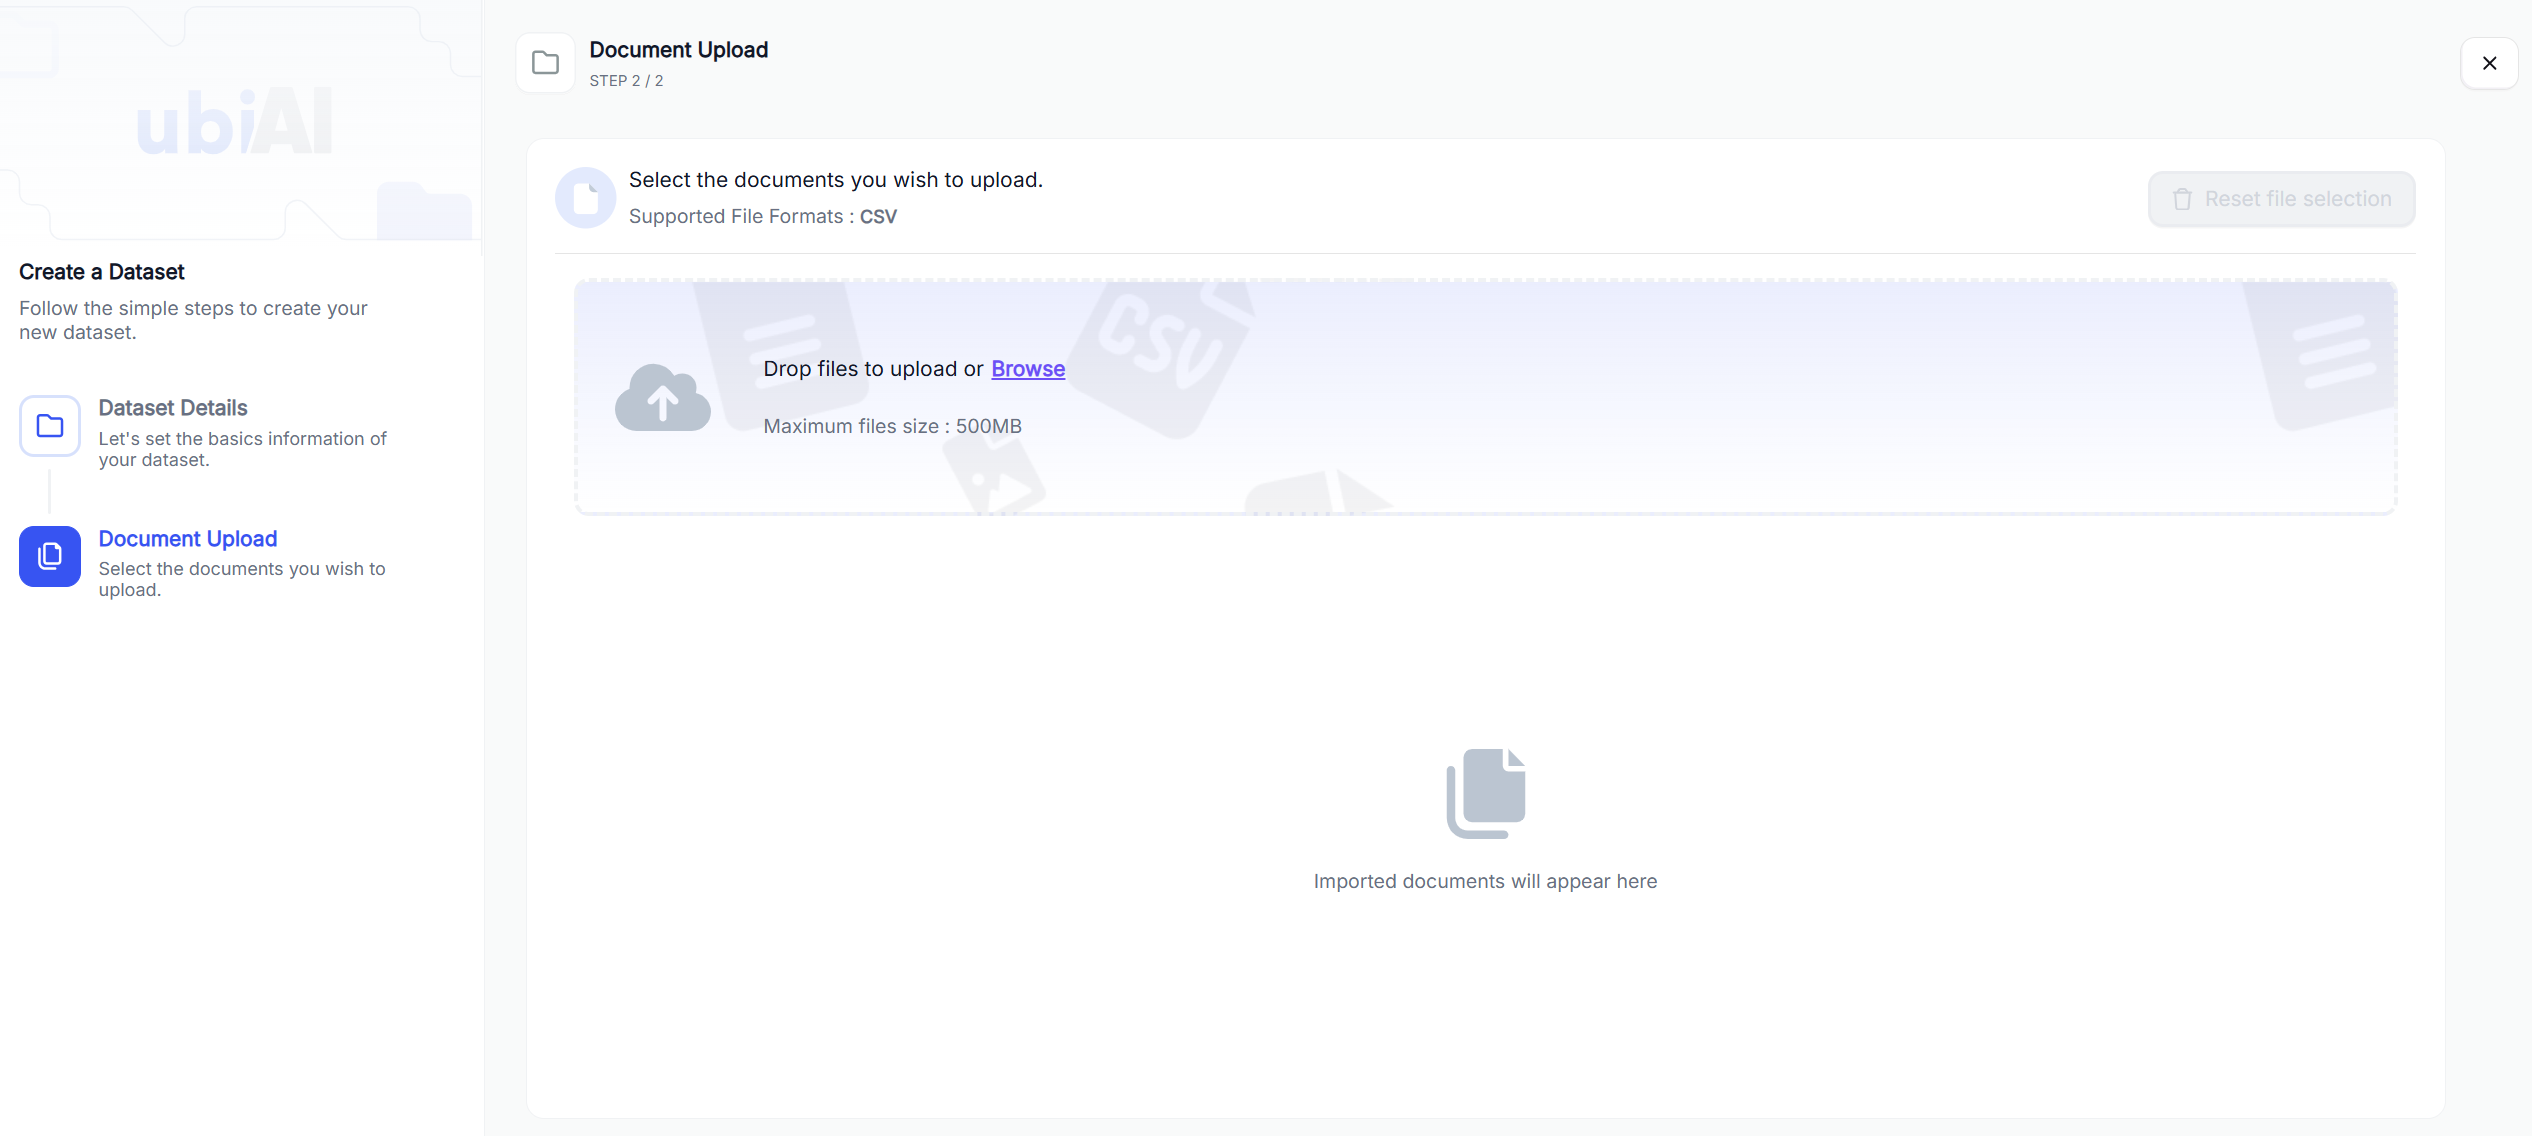




Simply drag and drop the data you've saved from Hugging Face, make any necessary edits, and validate it to get it ready for training.

Check out the UbiAI documentation for more information about how to use the platform:


**Fine-Tuning the Model**

Once the dataset is validated, the actual training process begins:

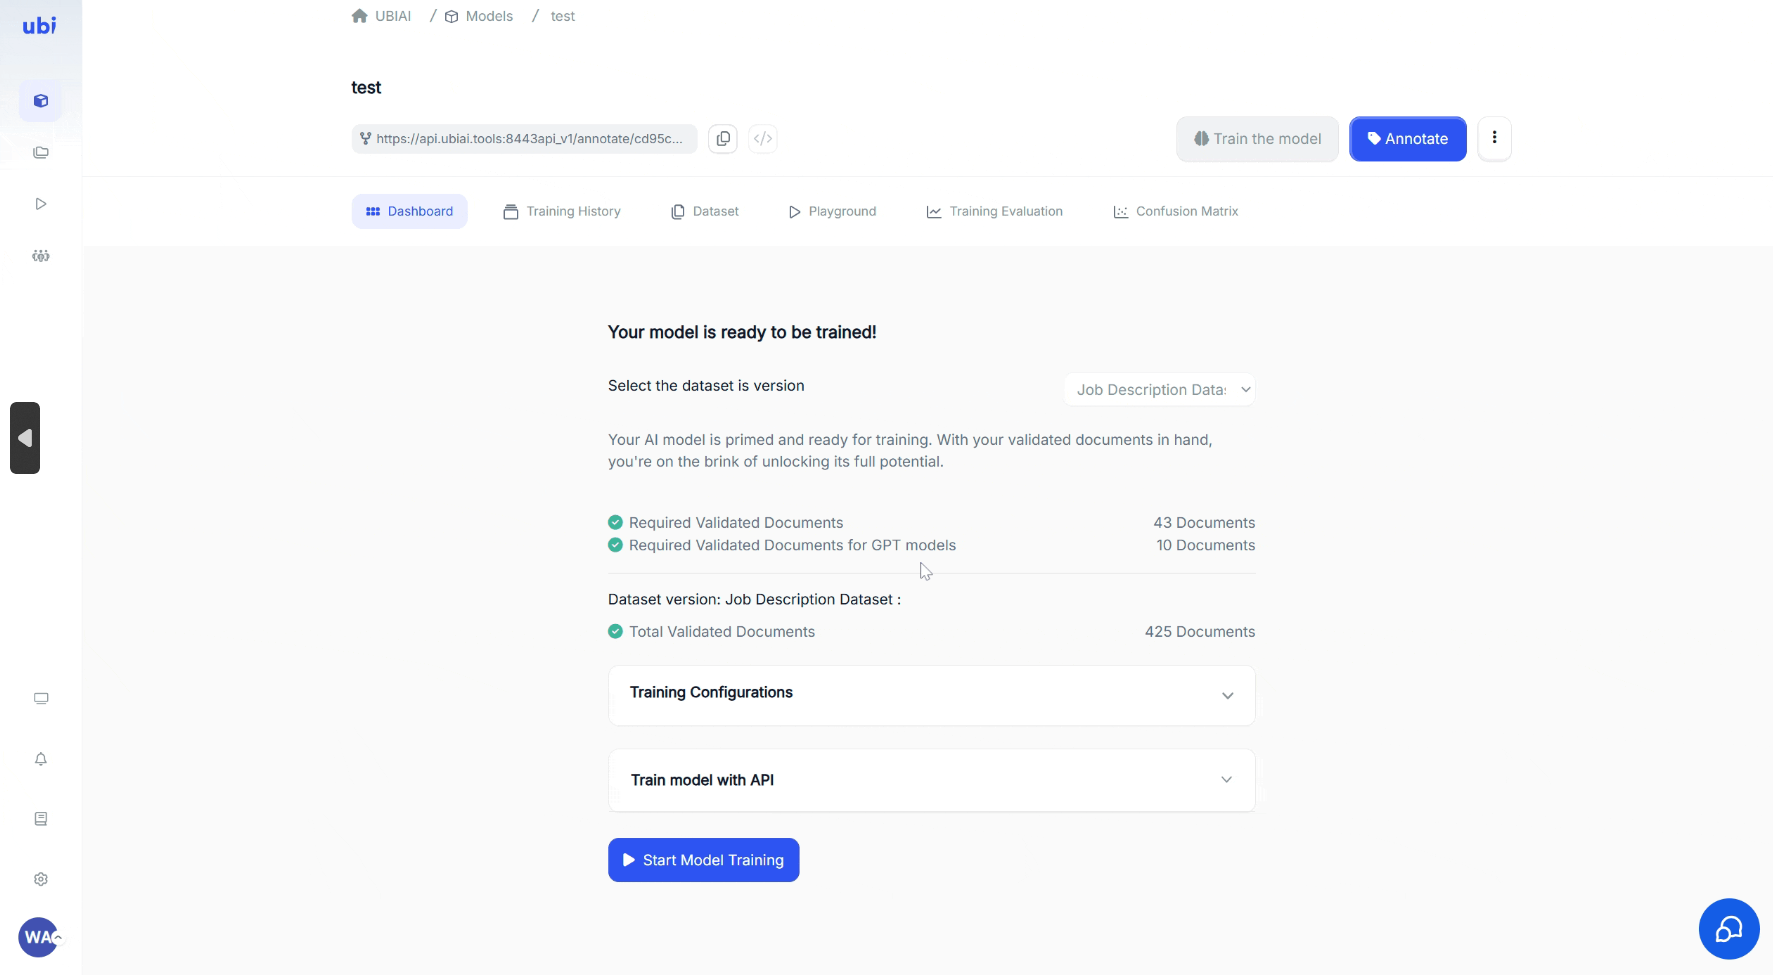

- **Choosing the Base Model:** Select a pre-trained language model. The base model serves as the starting point for fine-tuning, using its general knowledge while adapting it to your dataset.
- **Starting the Fine-Tuning Process:** Launch the training process. The model uses the question-context-response pairs to learn:
 - How to interpret questions.
 - What information in the context is relevant to the question.
 -How to generate meaningful and accurate responses based on the relevant information.

(check out the UbiAI LLM finetuning tutorial: https://www.youtube.com/watch?v=U77kUhKuAxM)


**Let's test how our model compares to the Base model**

In [ ]:
!pip install huggingface_hub
!pip install llama-parse
!pip install langchain langchain_community langchain_core langchain_huggingface

In [ ]:
from huggingface_hub import InferenceClient
client = InferenceClient(api_key="")

**Base Model:**

In [ ]:
def generate_response_with_base_model(prompt, context):
    combined_prompt = f"""You are a highly knowledgeable AI assistant. Given the user's question and the retrieved relevant documents.

Question: {prompt}

Retrieved Documents:
{context}
"""


    messages = [
        {
            "role": "user",
            "content": combined_prompt
        }
    ]

    completion = client.chat.completions.create(
        model="mistralai/Mistral-7B-Instruct-v0.3",
        messages=messages,
        max_tokens=500
    )


    return completion.choices[0].message["content"]


In [ ]:
prompt="Identify two factors that could affect user engagement on a website and their possible impact on sales."
context="Usability testing Usability testing is a technique used in user-centered interaction design to evaluate a product by testing it on users. This can be seen as an irreplaceable usability practice, since it gives direct input on how real users use the system. This is in contrast with usability inspection methods where experts use different methods to evaluate a user interface without involving users. Usability testing focuses on measuring a human-made product's capacity to meet its intended purpose. Examples of products that commonly benefit from usability testing are food, consumer products, web sites or web applications, computer interfaces, documents, and devices.", "in seven principles of part 10 of the ergonomics standard, the ISO 9241. This standard establishes a framework of ergonomic \"principles\" for the dialogue techniques with high-level definitions and illustrative applications and examples of the principles. The principles of the dialogue represent the dynamic aspects of the interface and can be mostly regarded as the \"feel\" of the interface. The seven dialogue principles are: The concept of usability is defined of the ISO 9241 standard by effectiveness, efficiency, and satisfaction of the user. Part 11 gives the following definition of usability: Effectiveness, efficiency, and satisfaction can be seen as quality", "(SIGCHI), Design of Communication (SIGDOC) and Computer Graphics and Interactive Techniques (SIGGRAPH). The Society for Technical Communication also has a special interest group on Usability and User Experience (UUX). They publish a quarterly newsletter called \"Usability Interface\". Usability Usability is the ease of use and learnability of a human-made object such as a tool or device. In software engineering, usability is the degree to which a software can be used by specified consumers to achieve quantified objectives with effectiveness, efficiency, and satisfaction in a quantified context of use. The object of use can be a software application, website, book, tool,", "Usability goals Tools, devices or software (as diverse as a TV remote control, the interface of an oven, or a word processor) must be evaluated before their release on the market from different points of view such as their technical properties or their usability. Usability evaluation allows assessing whether the product under evaluation is efficient enough (Are the users able to carry out their task while expending reasonable resources such as time, cognitive or physical demand), effective enough (Can the user complete the tasks they are supposed to perform with the tool? Is their performance complete and accurate?) and sufficiently", "rate quantification. They may look like (following): Usability goals Tools, devices or software (as diverse as a TV remote control, the interface of an oven, or a word processor) must be evaluated before their release on the market from different points of view such as their technical properties or their usability. Usability evaluation allows assessing whether the product under evaluation is efficient enough (Are the users able to carry out their task while expending reasonable resources such as time, cognitive or physical demand), effective enough (Can the user complete the tasks they are supposed to perform with the tool? Is", "from people, they can be finished more quickly and consistently. The idea of creating surrogate users for usability testing is an ambitious direction for the artificial intelligence community. In web development and marketing, A/B testing or split testing is an experimental approach to web design (especially user experience design), which aims to identify changes to web pages that increase or maximize an outcome of interest (e.g., click-through rate for a banner advertisement). As the name implies, two versions (A and B) are compared, which are identical except for one variation that might impact a user's behavior. Version A might be", "factors determining whether customers return to a website are ease of use and the presence of user-friendly features. Usability testing is important for finding problems and improvements in a web site. Methods for evaluating usability include heuristic evaluation, cognitive walkthrough, and user testing. Each technique has its own characteristics and emphasizes different aspects of the user experience. The popularity of online shopping continues to erode sales of conventional retailers. For example, Best Buy, the largest retailer of electronics in the U.S. in August 2014 reported its tenth consecutive quarterly dip in sales, citing an increasing shift by consumers to online", "user experience. The new labels, highlighted in yellow color, and aligned to the left of each sponsored link help users clearly differentiate between organic and sponsored results. On December 15, 2016, Google rolled out a new desktop search interface that mimics their modular mobile user interface. The mobile design consists of a tabular design that highlights search features in boxes. and works by imitating the desktop Knowledge Graph real estate, which appears in the right-hand rail of the search engine result page, these featured elements frequently feature Twitter carousels, People Also Search For, and Top Stories (vertical and horizontal design)", "hidden so that the webpage being viewed takes up the entire screen. The UI can be revealed by a right click of the mouse or by a swipe from the top or bottom edges of a touchscreen. When the UI is shown, the tabs are listed on the top of the screen, with a small preview of the webpage on each tab. A button to add a new tab is placed in the top-right corner. At the bottom of the screen, the address bar and navigational buttons are shown. Navigational buttons include the Back button (to navigate to the previous", "different components of web usability (learnability, efficiency, memorability, errors and satisfaction) by watching the users accomplishing their task. Usability testing allows to uncover the roadblocks and errors users encounter while accomplishing a task. As more results of usability research become available, this leads to the development of methodologies for enhancing web usability. There are a number of usability testing tools available in the market. In the context of e-commerce websites, the meaning of web-usability is narrowed down to efficiency: triggering sales and/or performing other transactions valuable to the business. Web usability received renewed attention as many early e-commerce websites started"
response = generate_response_with_base_model(prompt, context)

print(response)

Based on the documents provided, two factors that could affect user engagement on a website and their possible impact on sales are:

1. Usability: The usability of a website refers to how easy it is for users to use and learn. This includes aspects such as effectiveness, efficiency, and satisfaction. A website that is easy to use and navigate is likely to keep users engaged, as they will find it less frustrating and more enjoyable to interact with. This can lead to increased time spent on the site, which in turn can lead to increased sales as users are more likely to make purchases or perform other desired actions.

2. User Experience (UX): The overall user experience of a website can also greatly impact user engagement and sales. This includes factors such as the visual design, layout, and content. A well-designed website that provides a positive and enjoyable user experience is more likely to keep users engaged and encourage them to return, which can lead to increased sales.

For exa

**UbiAI Model:**

In [ ]:
import requests
import json
url = "https://api.ubiai.tools:8443/api_v1/annotate"
my_token = ""
data = {
    "input_text": (
        "Usability testing is a technique used in user-centered interaction design to evaluate a product by testing it on users. "
        "It gives direct input on how real users use the system, in contrast with usability inspection methods where experts evaluate "
        "the interface without involving users. Usability testing focuses on measuring a product's capacity to meet its intended purpose. "
        "Products like food, consumer products, websites, applications, and devices benefit from usability testing."
    ),
    "system_prompt": "You are a smart assistant that uses information to give accurate answers",
    "user_prompt": "Identify two factors that could affect user engagement on a website and their possible impact on sales. ",
    "temperature": 0.7
}
response = requests.post(url + my_token, json=data)

res = json.loads(response.content.decode("utf-8"))
print(res)


['1. User experience: A poor user experience during usability testing can lead to decreased engagement and ultimately, fewer sales, as potential customers may become frustrated and abandon the site.\n2. Ease of use: A website that is difficult to navigate or use can discourage users from making purchases, as they may find the process too time-consuming or confusing, preferring instead to look for a more user-friendly alternative.']


As you can see, the fine-tuned model's answer is better, offering concise, relevant, and straight-to-the-point responses.

## **What Comes Next?**

Once the model is finetuned, the next step is integrating it into a RAG system:

## **Settig Up our Workspace**

In [ ]:
%%writefile requirements.txt
langchain
langchain-community
fastembed
chromadb
python-dotenv
langchain-groq
chainlit
fastembed
unstructured[md]

Writing requirements.txt


In [ ]:
!pip install -r requirements.txt

In [ ]:
!pip uninstall nltk
!pip install nltk


In [ ]:
import shutil
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

## **Document processing  to extract the text as Markdown**

In [ ]:
import nest_asyncio
from llama_parse import LlamaParse


nest_asyncio.apply()
parser = LlamaParse(
    api_key="",
    result_type="markdown",
    language="en",
    verbose=True,
    is_formatting_instruction=False,
    parsing_instruction="""
    create a markdown of the following document.
    """
)


parsed_documents = parser.load_data("/content/7.pdf")
with open('parsed_output.md', 'w') as f:
    for doc in parsed_documents:
        f.write(doc.text + '\n')

Started parsing the file under job_id e142ef49-b42e-48d2-8040-1044d474363e


In [ ]:
input_md_file = "/content/parsed_output.md"
output_txt_file = "/content/output.txt"


with open(input_md_file, "r", encoding="utf-8") as md_file:
    content = md_file.read()

with open(output_txt_file, "w", encoding="utf-8") as txt_file:
    txt_file.write(content)

print(f"Converted '{input_md_file}' to '{output_txt_file}' successfully.")


Converted '/content/parsed_output.md' to '/content/output.txt' successfully.


## **Setting Up the Retrieval Mechanism**

Implement a retrieval system to fetch relevant context documents based on user queries. The retrieval system acts as the "knowledge base" for the model to interact with. (In the tutorial I used chromaddb but you can pick what works best for you)

**Let's create and populate our Vector Database using The document we just Processed:**

In [ ]:
import json
import re
from huggingface_hub import InferenceClient
from langchain.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.document_loaders import UnstructuredMarkdownLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
def create_and_populate_vector_database():
    """
    Creates and populates a vector database with document embeddings.
    This function only needs to be run once to set up the vector database.
    """

    markdown_path = "/content/parsed_output.md"
    loader = UnstructuredMarkdownLoader(markdown_path)
    documents = loader.load()


    text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=100)
    docs = text_splitter.split_documents(documents)


    embed_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


    vectorstore = Chroma(
        persist_directory="./chroma_db",
        embedding_function=embed_model
    )
    vectorstore.add_documents(docs)
    vectorstore.persist()

    print('Vector database created and populated successfully!')
    return vectorstore

In [ ]:
create_and_populate_vector_database()


<ipython-input-3-894321e189db>:16: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embed_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or 

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

<ipython-input-3-894321e189db>:19: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(


Vector database created and populated successfully!


<ipython-input-3-894321e189db>:24: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vectorstore.persist()  # Saves the vector store to disk


**Let's make a function that will help us retrive from the vector database:**

In [ ]:
from langchain.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings

def query_vector_database(query):
    embed_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

    vectorstore = Chroma(
        persist_directory="./chroma_db",
        embedding_function=embed_model
    )

    results = vectorstore.similarity_search(query, k=1)

    retrieved_info = " ".join(result.page_content for result in results)

    return retrieved_info



## **Building our Rag System using our UbiAI Model**

In [ ]:
from langchain.prompts import PromptTemplate
from langchain.chains import RetrievalQA
from langchain.llms.base import LLM

In [ ]:
import requests
import json
import re

def generate_response(messages, context):
    url = "https://api.ubiai.tools:8443/api_v1/annotate"
    my_token = ""

    data = {
        "input_text": context,
        "system_prompt": "You are a smart assistant that uses information to give accurate answers",
        "user_prompt": messages,
        "temperature": 0.7,
        "model": "mistralai/Mistral-7B-Instruct-v0.3"
    }

    response = requests.post(url + my_token, json=data)

    res = json.loads(response.content.decode("utf-8"))

    return res


## **Testing our RAFT**

In [ ]:
prompt="what is a neural network?"
context= query_vector_database(prompt)


In [ ]:
response = generate_response(prompt,context)
print(response)

['A neural network is a type of computational model inspired by the structure and function of the human brain. It is composed of interconnected processing nodes, or neurons, that work together to analyze and learn patterns from data. Neural networks are a fundamental tool in language processing and other areas of artificial intelligence. Modern neural networks consist of many small computing units, each taking in a vector of input values and producing a single output value. They are called feedforward networks because the computation flows iteratively from one layer of units to the next without looping back. Neural networks share similar mathematics to logistic regression but are more powerful and can learn more complex functions. The use of deep neural networks, which have many layers, is a modern approach to neural networks and is often referred to as deep learning.']


**Let's see what the Base Model would answer:**

In [ ]:
def generate_response_with_base_model(prompt, context):
    combined_prompt = f"""You are a highly knowledgeable AI assistant. Given the user's question and the retrieved relevant documents.

Question: {prompt}

Retrieved Documents:
{context}
"""


    messages = [
        {
            "role": "user",
            "content": combined_prompt
        }
    ]

    completion = client.chat.completions.create(
        model="mistralai/Mistral-7B-Instruct-v0.3",
        messages=messages,
        max_tokens=500
    )


    return completion.choices[0].message["content"]


response = generate_response_with_base_model(prompt, context)

print(response)


Based on the information provided in the document, a neural network is a computational tool that is fundamental to language processing and has a long history in the field. The origins of neural networks can be traced back to the McCulloch-Pitts neuron, a simplified model of a biological neuron, which was first introduced in 1943. However, modern neural networks no longer draw on these biological inspirations and are instead networks of small computing units.

Each computing unit, also known as a neuron, takes a vector of input values and produces a single output value. In the context of the document, the focus is on the use of neural networks for classification. The network architecture discussed is called a feedforward network, which means that the computation proceeds iteratively from one layer of units to the next.

Modern neural networks are often referred to as deep learning networks because they are often deep, meaning they have many layers. This depth allows for a more complex a

**Let's compare the results:**

The **RAFT** output is more focused and concise, addressing the user's query directly by highlighting relevant details about neural networks and their role in language processing. It avoids unnecessary filler phrases like "based on the information provided" or "in summary," which are common in the RAG response.

The **Base Model**, on the other hand, provides a longer, more generic answer with irrelevant historical context and general information, lacking the depth and focus that RAFT offers. Essentially, RAFT refines the RAG approach by focusing on the most pertinent information, resulting in clearer and more relevant answers.

